<p style="font: 30px Georgia; 
          text-decoration: underline; 
          text-align:center; 
          padding:20px; 
          background-color:PapayaWhip "> 
     PROJECT ON CRIME RATE PREDICTION 
</p>

<p style="font: 20px Georgia;  
          font-style: oblique;
          text-align:justify;
          padding:15px; 
          background-color:PapayaWhip "> 
    Name: &emsp;&ensp;Anubhav<br>
    Course: &emsp;M.C.A.<br>
    Semester: &nbsp; 4th
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    IMPORTING THE REQUIRED LIBRARIES 
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    GETTING THE DATASET 
</p>

In [2]:
dataset = pd.read_excel(r"C:\Users\webze\OneDrive\Desktop\Crime-x\Crime-Rate-Prediction-main\Dataset\crp.xlsx", sheet_name="Sheet1")

In [3]:
dataset

,Year,City,Population (in Lakhs) (2011)+,Murder,Kidnapping,Crime against women,Crime against children,Crime Committed by Juveniles,Crime against Senior Citizen,Crime against SC,Crime against ST,Economic Offences,Cyber Crimes
0,2014,Ahmedabad,63.5,82,367,1371,437,215,68,66,6,399,32
1,2015,Ahmedabad,63.5,94,332,1067,609,157,17,60,9,378,28
2,2016,Ahmedabad,63.5,103,376,1126,481,258,362,96,10,479,77
3,2017,Ahmedabad,63.5,90,263,1405,600,405,534,119,6,608,112
4,2018,Ahmedabad,63.5,98,277,1416,733,352,733,145,9,842,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2017,Surat,45.8,89,332,559,526,436,131,32,10,719,105
157,2018,Surat,45.8,108,373,712,1075,409,161,29,13,829,155
158,2019,Surat,45.8,97,358,1015,770,516,232,34,19,804,228
159,2020,Surat,45.8,116,163,633,419,298,69,20,12,401,204


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           161 non-null    int64  
 1   City                           161 non-null    object 
 2   Population (in Lakhs) (2011)+  161 non-null    float64
 3   Murder                         161 non-null    int64  
 4   Kidnapping                     161 non-null    int64  
 5   Crime against women            161 non-null    int64  
 6   Crime against children         161 non-null    int64  
 7   Crime Committed by Juveniles   161 non-null    int64  
 8   Crime against Senior Citizen   161 non-null    int64  
 9   Crime against SC               161 non-null    int64  
 10  Crime against ST               161 non-null    int64  
 11  Economic Offences              161 non-null    int64  
 12  Cyber Crimes                   161 non-null    int

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    DATASET INFORMATION 
</p>

*  In this study, the data has been collected from the **National Crime Records Bureau (NCRB)**, India.
*  The data provides statistics on the number of crimes commited in **19 metropolitan cities** during the year **2014 to 2021**.
*  The 19 metropolitan cities are:<br>
    `*  Ahmedabad        *  Bengaluru        *  Chennai   `<br>
    `*  Coimbatore       *  Delhi            *  Ghaziabad `<br>
    `*  Hyderabad        *  Indore           *  Jaipur    `<br>
    `*  Kanpur           *  Kochi            *  Kolkata   `<br>
    `*  Kozhikode        *  Lucknow          *  Mumbai    `<br>
    `*  Nagpur           *  Patna            *  Pune      `<br>
    `*  Surat                                             `<br>
*  It contains the records of the 10 different category of crimes commited namely:<br>
    `*  Murder                               *  Kidnapping                   `<br>
    `*  Crime against women                  *  Crime against children       `<br>
    `*  Crime Committed by Juveniles         *  Crime against Senior Citizen `<br>
    `*  Crime against SC                     *  Crime against ST             `<br>
    `*  Economic Offences                    *  Cyber Crimes                 `<br>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    DATA VISUALISATION
</p>

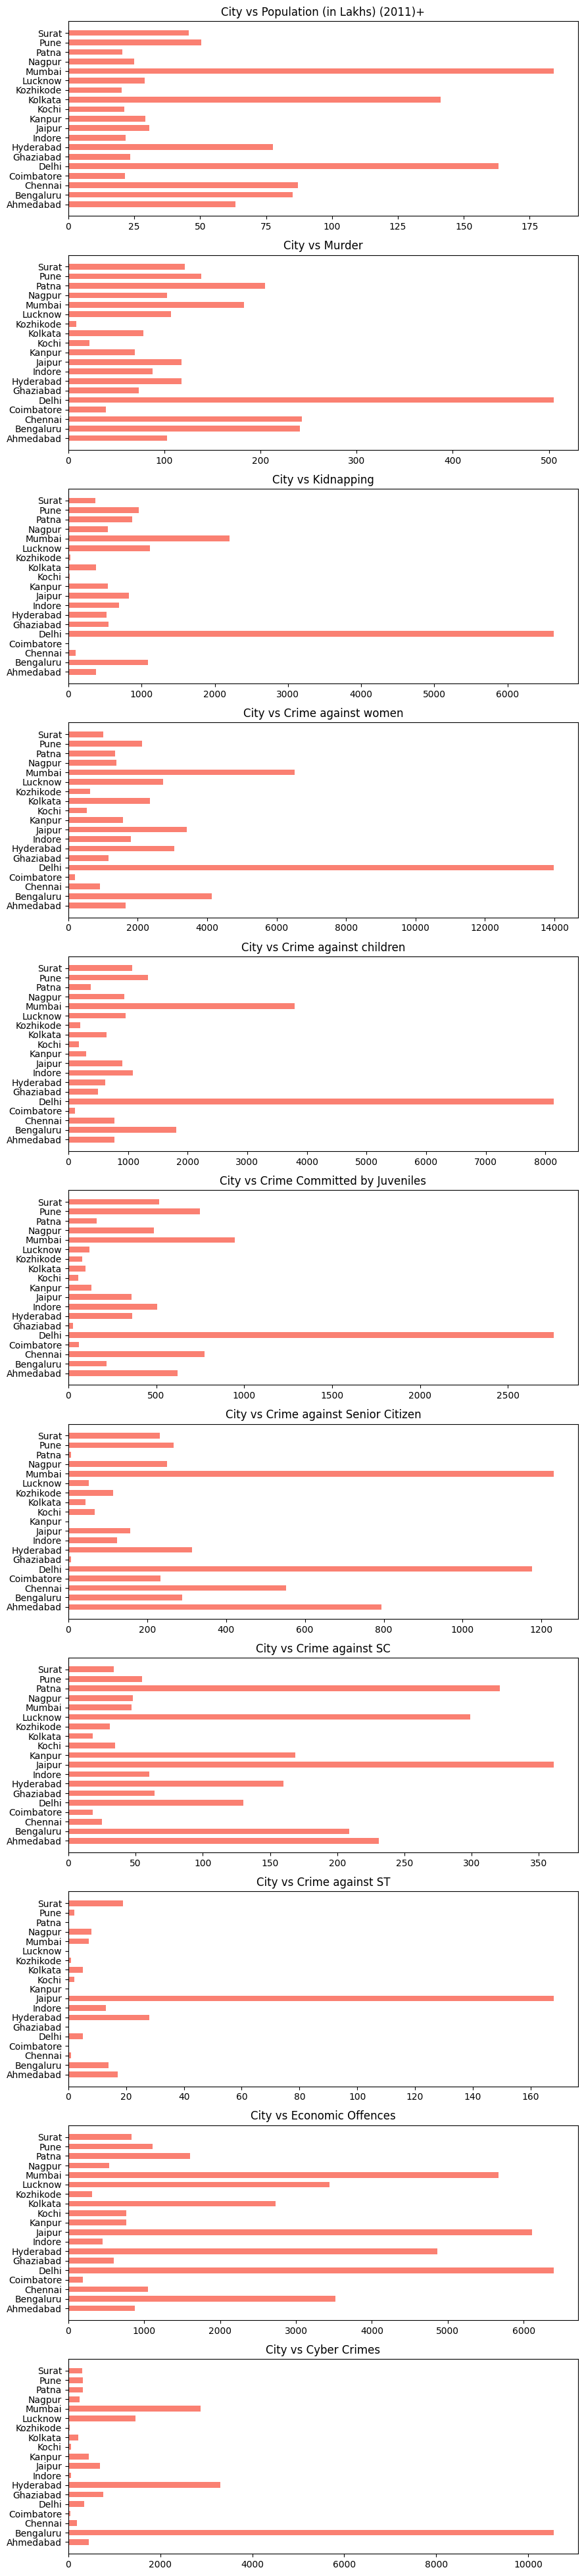

In [5]:
fig, ax = plt.subplots(11, 1, figsize=(10, 50))

for i in range(0, 11):
    ax[i].barh(dataset['City'], dataset[dataset.columns[i+2]], 0.6, color='Salmon')
    ax[i].set_title('City vs ' + dataset.columns[i+2])
plt.show()

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    NEW DATASET CREATION
</p>

In [7]:
new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Lakhs) (2011)+', 'Number Of Cases', 'Type'])
for i in range(3, 13):
    temp = dataset[['Year', 'City', 'Population (in Lakhs) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[[dataset.columns[i]]]
    temp['Type'] = dataset.columns[i]
    
    new_df = pd.concat([new_df, temp])

C:\Users\webze\AppData\Local\Temp\ipykernel_29396\2150212361.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, temp])


In [8]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
156,2017,Surat,45.8,105,Cyber Crimes
157,2018,Surat,45.8,155,Cyber Crimes
158,2019,Surat,45.8,228,Cyber Crimes
159,2020,Surat,45.8,204,Cyber Crimes


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    DATA PRE-PROCESSING
</p>

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    The number of cases in each crime category column will be transformed into the crime rate per population(in lakhs).<br>
    Crime Rate = Total Crime Cases / Population (in Lakhs)
</p>

In [10]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Lakhs) (2011)+']

In [9]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
156,2017,Surat,45.8,105,Cyber Crimes
157,2018,Surat,45.8,155,Cyber Crimes
158,2019,Surat,45.8,228,Cyber Crimes
159,2020,Surat,45.8,204,Cyber Crimes


<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    As the Number Of Cases Column is obsolete, it should be dropped
</p>

In [12]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [10]:
new_df

,Year,City,Population (in Lakhs) (2011)+,Number Of Cases,Type
0,2014,Ahmedabad,63.5,82,Murder
1,2015,Ahmedabad,63.5,94,Murder
2,2016,Ahmedabad,63.5,103,Murder
3,2017,Ahmedabad,63.5,90,Murder
4,2018,Ahmedabad,63.5,98,Murder
...,...,...,...,...,...
156,2017,Surat,45.8,105,Cyber Crimes
157,2018,Surat,45.8,155,Cyber Crimes
158,2019,Surat,45.8,228,Cyber Crimes
159,2020,Surat,45.8,204,Cyber Crimes


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          margin-top:20px;
          padding:15px; 
          background-color:MistyRose"> 
    LOADING THE NEW DATASET
</p>

In [12]:
new_dataset = pd.read_excel(r"C:\Users\webze\OneDrive\Desktop\Crime-x\Crime-Rate-Prediction-main\Dataset\new_dataset.xlsx", sheet_name="Sheet1")

In [13]:
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,Ahmedabad,63.5,Murder,1.291339
1,2015,Ahmedabad,63.5,Murder,1.480315
2,2016,Ahmedabad,63.5,Murder,1.622047
3,2017,Ahmedabad,63.5,Murder,1.417323
4,2018,Ahmedabad,63.5,Murder,1.543307
...,...,...,...,...,...
1524,2017,Surat,45.8,Cyber Crimes,2.292576
1525,2018,Surat,45.8,Cyber Crimes,3.384279
1526,2019,Surat,45.8,Cyber Crimes,4.978166
1527,2020,Surat,45.8,Cyber Crimes,4.454148


In [14]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           1529 non-null   int64  
 1   City                           1529 non-null   object 
 2   Population (in Lakhs) (2011)+  1529 non-null   float64
 3   Type                           1529 non-null   object 
 4   Crime Rate                     1529 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 59.9+ KB


In [15]:
new_dataset.describe()

,Year,Population (in Lakhs) (2011)+,Crime Rate
count,1529.000000,1529.000000,1529.000000
mean,2017.531720,60.124591,11.522700
std,2.323158,49.885716,19.487028
min,2014.000000,20.300000,0.000000
25%,2016.000000,21.700000,0.944882
50%,2018.000000,30.700000,4.006515
75%,2020.000000,85.000000,14.200000
max,2024.000000,184.100000,198.925081


<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    The data is clean with no null values with column city and type as object/categorical Dtype.
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          margin-top:20px;
          background-color:MistyRose"> 
    LABEL ENCODING
</p>

<p style="font: 15px Georgia; 
          color: green;
          font-style: oblique;
          text-align: justify;"> 
    Since two columns in our dataset has categorical values i.e City and Type. <br>
    Thus, to make them machine-readable, we must convert them to numeric labels.
</p>

In [16]:
le = LabelEncoder()

In [17]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [18]:
# Saving the mapping file for further use
file = open(r'C:\Users\webze\OneDrive\Desktop\Crime-x\Crime-Rate-Prediction-main\Mappings\City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [24]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [19]:
# Saving the mapping file for further use
file = open(r'C:\Users\webze\OneDrive\Desktop\Crime-x\Crime-Rate-Prediction-main\Mappings\Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Ahmedabad - 0

Bengaluru - 1

Chennai - 2

Coimbatore - 3

Delhi - 4

Ghaziabad - 5

Hyderabad - 6

Indore - 7

Jaipur - 8

Kanpur - 9

Kochi - 10

Kolkata - 11

Kozhikode - 12

Lucknow - 13

Mumbai - 14

Nagpur - 15

Patna - 16

Pune - 17

Surat - 18



In [24]:
new_dataset

,Year,City,Population (in Lakhs) (2011)+,Type,Crime Rate
0,2014,0,63.5,Murder,1.291339
1,2015,0,63.5,Murder,1.480315
2,2016,0,63.5,Murder,1.622047
3,2017,0,63.5,Murder,1.417323
4,2018,0,63.5,Murder,1.543307
...,...,...,...,...,...
1524,2017,18,45.8,Cyber Crimes,2.292576
1525,2018,18,45.8,Cyber Crimes,3.384279
1526,2019,18,45.8,Cyber Crimes,4.978166
1527,2020,18,45.8,Cyber Crimes,4.454148


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    SPLITTING OF DATASET FOR TRAINING / TESTING
</p>

In [20]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[2014, 0, 63.5, 'Murder'],
       [2015, 0, 63.5, 'Murder'],
       [2016, 0, 63.5, 'Murder'],
       ...,
       [2019, 18, 45.8, 'Cyber Crimes'],
       [2020, 18, 45.8, 'Cyber Crimes'],
       [2021, 18, 45.8, 'Cyber Crimes']], dtype=object)

In [21]:
y = new_dataset['Crime Rate'].values
y

array([1.29133858, 1.48031496, 1.62204724, ..., 4.97816594, 4.45414847,
       6.4628821 ])

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [23]:
x_train

array([[2014, 15, 25.0, 'Cyber Crimes'],
       [2018, 4, 163.1, 'Crime against women'],
       [2020, 10, 21.2, 'Crime against ST'],
       ...,
       [2014, 11, 141.1, 'Economic Offences'],
       [2018, 12, 20.3, 'Murder'],
       [2021, 15, 25.0, 'Cyber Crimes']], dtype=object)

In [24]:
y_train

array([ 2.16      , 71.88228081,  0.09433962, ..., 16.13040397,
        0.39408867,  7.68      ])

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    MODEL CREATION
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Nearest Neighbour
</p> 

In [34]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 7.452988397414342
Mean Squared Error: 179.5867443547013
R2 score: 0.4028274995162756


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Decision Tree Regressor
</p>

In [36]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.084355311940117
Mean Squared Error: 46.85009854805176
R2 score: 0.8442112718375778


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Random Forest Regressor
</p>

In [38]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2.8917816212835645
Mean Squared Error: 36.20075463429378
R2 score: 0.8796231022393215


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:PaleTurquoise "> 
    Neural Networks MLPRegressor
</p>

In [40]:
model5 = MLPRegressor(random_state=0)
model5.fit(x_train, y_train)
y_pred = model5.predict(x_test)

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 11.304631354055292
Mean Squared Error: 294.0891403791671
R2 score: 0.022077336741147202


<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:LightGreen ">
    CONCLUSION:<br><br>
    The Random Forest Regression model demonstrates the best accuracy in predicting test data among the five selected models.
</p>

<p style="font: 20px Georgia; 
          color: black;
          font-style: oblique;
          text-align: justify;
          padding:15px; 
          background-color:MistyRose"> 
    SAVING THE MODEL
</p>

In [42]:
import pickle

In [43]:
#saving the model as .pkl file
pkl_filename = r"C:\Users\webze\OneDrive\Desktop\New folder\Crime-Rate-Prediction-main\Model\model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [44]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.8796231022393215
